# Rectificación térmica

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
import numpy as np

## Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_context("paper", font_scale = 1.6)
plt.style.use(["science", "grid"])

## Archivos con los datos del flujo de calor

In [3]:
frecuencias = np.loadtxt("datos/frecuencias_heatmap.csv")
frecuencias.size

91

In [4]:
exponentes = np.loadtxt("datos/exponente_heatmap.csv").astype(int)
nexp = exponentes.size

In [5]:
flujocalor_izq = np.loadtxt("datos/flujocalor_izq_heatmap.csv")
flujocalor_izq.shape

(10, 91)

In [6]:
flujocalor_der = np.loadtxt("datos/flujocalor_der_heatmap.csv")
flujocalor_der.shape

(10, 91)

In [7]:
if np.all(flujocalor_der > flujocalor_izq):
    flujocalor_max = flujocalor_der
    flujocalor_min = flujocalor_izq
else:
    flujocalor_max = flujocalor_izq
    flujocalor_min = flujocalor_der

In [8]:
flujocalor = flujocalor_max - flujocalor_min
flujocalor.shape

(10, 91)

In [9]:
df_flujocalor = pd.DataFrame(data = flujocalor,
                                 index = np.round(exponentes, 5),
                                 columns = np.round(frecuencias, 5))
df_flujocalor

,0.0010,0.0015,0.0020,0.0025,0.0030,0.0035,0.0040,0.0045,0.0050,0.0055,...,55.0000,60.0000,65.0000,70.0000,75.0000,80.0000,85.0000,90.0000,95.0000,100.0000
1,0.015826,0.015888,0.015951,0.016014,0.016076,0.016139,0.016201,0.016264,0.016327,0.016389,...,0.015715,0.015713,0.015712,0.015712,0.015711,0.015710,0.015710,0.015709,0.015709,0.015708
2,0.021012,0.021101,0.021190,0.021278,0.021367,0.021456,0.021544,0.021633,0.021722,0.021810,...,0.020853,0.020851,0.020850,0.020849,0.020848,0.020847,0.020846,0.020846,0.020845,0.020845
3,0.026312,0.026427,0.026543,0.026658,0.026773,0.026888,0.027003,0.027118,0.027233,0.027348,...,0.026105,0.026103,0.026101,0.026100,0.026098,0.026097,0.026096,0.026096,0.026095,0.026094
4,0.031375,0.031515,0.031656,0.031796,0.031936,0.032077,0.032217,0.032357,0.032497,0.032637,...,0.031122,0.031120,0.031118,0.031116,0.031115,0.031113,0.031112,0.031111,0.031110,0.031110
5,0.036164,0.036328,0.036492,0.036656,0.036819,0.036983,0.037147,0.037311,0.037474,0.037638,...,0.035868,0.035865,0.035863,0.035861,0.035859,0.035858,0.035856,0.035855,0.035854,0.035853
6,0.040688,0.040874,0.041060,0.041247,0.041433,0.041619,0.041805,0.041991,0.042177,0.042362,...,0.040351,0.040348,0.040346,0.040344,0.040342,0.040340,0.040339,0.040337,0.040336,0.040335
7,0.044967,0.045174,0.045381,0.045588,0.045795,0.046002,0.046209,0.046416,0.046623,0.046830,...,0.044592,0.044589,0.044586,0.044583,0.044581,0.044580,0.044578,0.044577,0.044575,0.044574
8,0.049021,0.049248,0.049475,0.049702,0.049929,0.050156,0.050383,0.050609,0.050836,0.051063,...,0.048610,0.048606,0.048603,0.048601,0.048598,0.048596,0.048595,0.048593,0.048592,0.048590
9,0.052870,0.053116,0.053362,0.053608,0.053854,0.054100,0.054345,0.054591,0.054836,0.055082,...,0.052425,0.052421,0.052418,0.052415,0.052413,0.052410,0.052409,0.052407,0.052405,0.052404
10,0.056529,0.056793,0.057057,0.057321,0.057585,0.057848,0.058112,0.058375,0.058639,0.058902,...,0.056052,0.056048,0.056044,0.056041,0.056038,0.056036,0.056034,0.056032,0.056031,0.056029


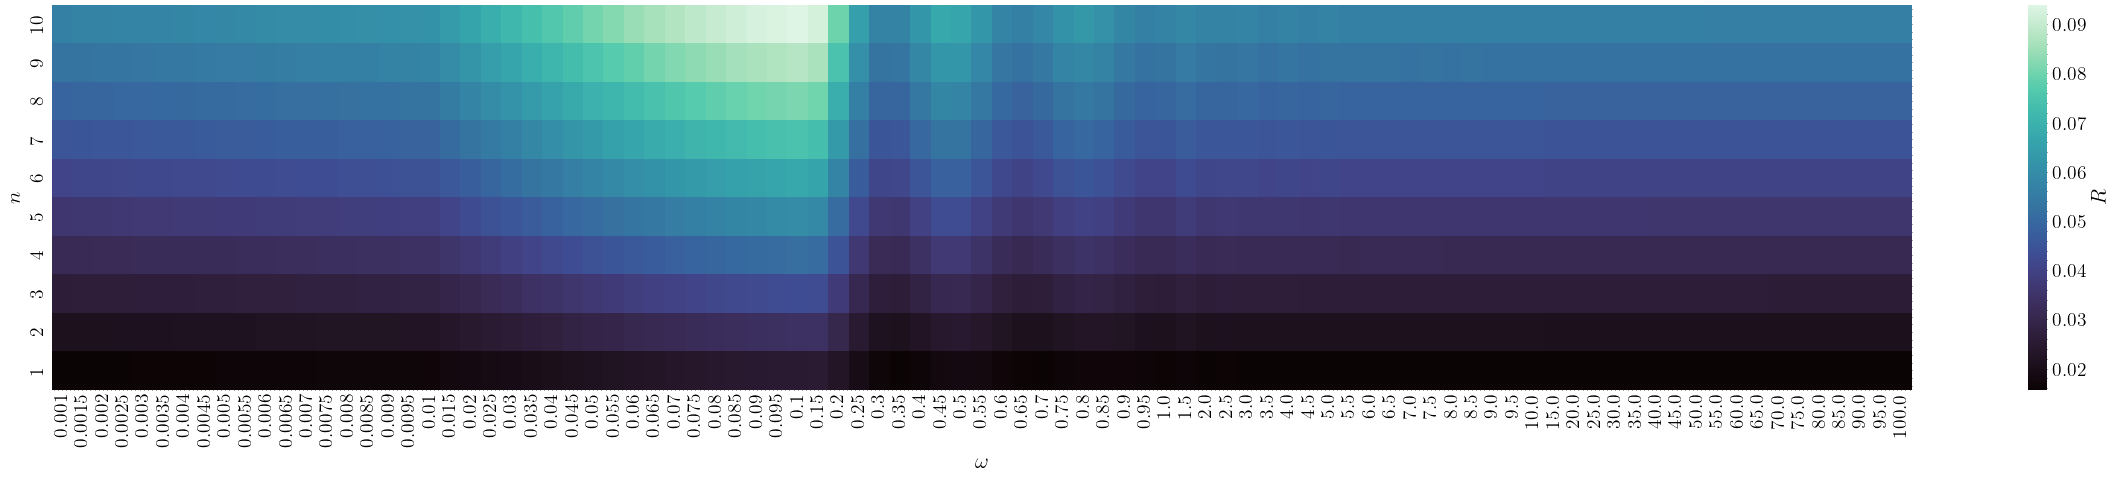

In [10]:
plt.figure(figsize = (30,5))
ax = sns.heatmap(data = df_flujocalor, cmap = "mako", cbar_kws = {"label" : "$R$"}, vmax = np.max(flujocalor), vmin = np.min(flujocalor), robust = True, linewidths = 0.0)
ax.set(xlabel="$\omega$",
       ylabel="$n$",)
ax.invert_yaxis()
plt.savefig("graficas/rectificacion_heatmap.png", dpi = 300, bbox_inches = "tight")
plt.show()